# Selective text annotations with plotnine

Sometimes you have a lot of datapoints on a graphic, but only want to annotate a few of them! That's where selective highlights and annotations come in handy.

In [15]:
import pandas as pd
from plotnine import *

df = pd.read_csv("countries.csv")
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


In [16]:
df.shape

(188, 5)

## Plot a subset of your data on top of existing data

If you want to annotate a subset of your data, it's usually best to create a separate dataframe just for the items you want to annotate.

In [17]:
annotations = df[df.country.isin(['Tonga', 'Angola', 'Iceland'])]
annotations

,country,continent,gdp_per_capita,life_expectancy,population
3,Angola,Africa,2446,45.234,13926373
74,Iceland,Europe,31092,79.720,281210
169,Tonga,Oceania,4886,70.810,97935


Then, you first plot with your normal dataset, then add the annotations in on top. In this case we start by building a standard scatterplot, then pass the annotations dataframe to `geom_point` and `geom_text` to draw points and text *just for that dataframe*.

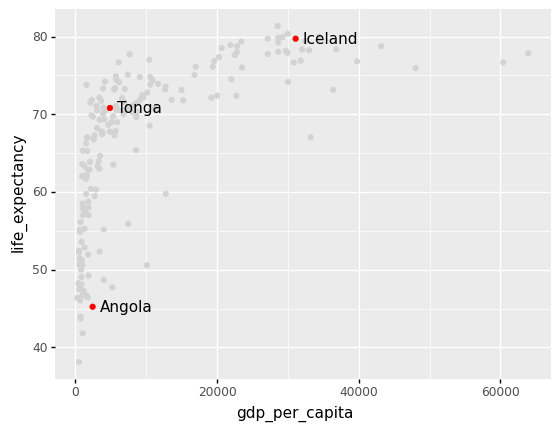

<ggplot: (310896580)>

In [27]:
(
    ggplot(df)
    + aes(x='gdp_per_capita', y='life_expectancy', label='country')
    + geom_point(color='lightgrey')
    + geom_point(annotations, color='red')
    + geom_text(annotations, ha='left', nudge_x=1000)
)

By default, every `geom_point` or `geom_text` uses the `df` you sent to `ggplot`. If you give it a different dataset, though, it'll plot that different data!